### Acquire and Prep

Throughout the exercises for Regression in Python lessons, you will use the following example scenario: As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

The first step will be to acquire and prep the data. Do your work for this exercise in a file named ```wrangle.py```.



1.  Acquire customer_id, monthly_charges, tenure, and total_charges from ```telco_churn``` database for all customers with a 2 year contract.


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import acquire
import wrangle
from wrangle import wrangle_telco


In [2]:
# use get_telco_charges to acquire the data

df = acquire.get_telco_charges()
df.head()

,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.8
2,0016-QLJIS,65,90.45,5957.9
3,0017-DINOC,54,45.20,2460.55
4,0017-IUDMW,72,116.80,8456.75


In [3]:
df.shape

(1695, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   tenure           1695 non-null   int64  
 2   monthly_charges  1695 non-null   float64
 3   total_charges    1695 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [5]:
df.describe()

,tenure,monthly_charges
count,1695.000000,1695.000000
mean,56.735103,60.770413
std,18.209363,34.678865
min,0.000000,18.400000
25%,48.000000,24.025000
50%,64.000000,64.350000
75%,71.000000,90.450000
max,72.000000,118.750000


In [6]:
print(df.columns[df.isnull().any()])

Index([], dtype='object')


In [7]:
df.total_charges.value_counts()

           10
844.45      2
343.45      2
7334.05     2
5682.25     2
           ..
6549.45     1
1433.8      1
4233.95     1
1229.1      1
7758.9      1
Name: total_charges, Length: 1678, dtype: int64

In [8]:
df.shape

(1695, 4)

## Takeaways:  
- customer_id can remain an object as we will not be feeding it into the model
- total_charges is an object and needs to be converted to a float  
- no immediate indicators of null values

In [9]:
df.head()

,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.8
2,0016-QLJIS,65,90.45,5957.9
3,0017-DINOC,54,45.20,2460.55
4,0017-IUDMW,72,116.80,8456.75


2. Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate.

In [10]:
# examine total_charges
df.total_charges.value_counts()

           10
844.45      2
343.45      2
7334.05     2
5682.25     2
           ..
6549.45     1
1433.8      1
4233.95     1
1229.1      1
7758.9      1
Name: total_charges, Length: 1678, dtype: int64

In [11]:
# ensure there are no nulls
missing = df.isnull().sum()
missing[missing>0]
missing

customer_id        0
tenure             0
monthly_charges    0
total_charges      0
dtype: int64

In [12]:
# utilize a regex replacement to remove whitespace and replace the whitespace with NaNs
df['total_charges'] = df['total_charges'].replace(r'^\s*$', np.nan, regex=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   tenure           1695 non-null   int64  
 2   monthly_charges  1695 non-null   float64
 3   total_charges    1685 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [14]:
missing = df.isnull().sum()
missing[missing>0]
missing

customer_id         0
tenure              0
monthly_charges     0
total_charges      10
dtype: int64

In [15]:
df[df.total_charges.isnull()]

,customer_id,tenure,monthly_charges,total_charges
234,1371-DWPAZ,0,56.05,NaN
416,2520-SGTTA,0,20.00,NaN
453,2775-SEFEE,0,61.90,NaN
505,3115-CZMZD,0,20.25,NaN
524,3213-VVOLG,0,25.35,NaN
678,4075-WKNIU,0,73.35,NaN
716,4367-NUYAO,0,25.75,NaN
726,4472-LVYGI,0,52.55,NaN
941,5709-LVOEQ,0,80.85,NaN
1293,7644-OMVMY,0,19.85,NaN


In [16]:
df[df.tenure == 1]

,customer_id,tenure,monthly_charges,total_charges
188,1099-GODLO,1,20.35,20.35
1449,8559-WNQZS,1,20.45,20.45


In [17]:
df.assign(total_charges=df.total_charges.fillna(0))

,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.8
2,0016-QLJIS,65,90.45,5957.9
3,0017-DINOC,54,45.20,2460.55
4,0017-IUDMW,72,116.80,8456.75
...,...,...,...,...
1690,9964-WBQDJ,71,24.40,1725.4
1691,9972-EWRJS,67,19.25,1372.9
1692,9975-GPKZU,46,19.75,856.5
1693,9993-LHIEB,67,67.85,4627.65


In [18]:
# convert total_charges to float
df.total_charges=pd.to_numeric(df.total_charges, errors='coerce').astype('float64')
    

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   tenure           1695 non-null   int64  
 2   monthly_charges  1695 non-null   float64
 3   total_charges    1685 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


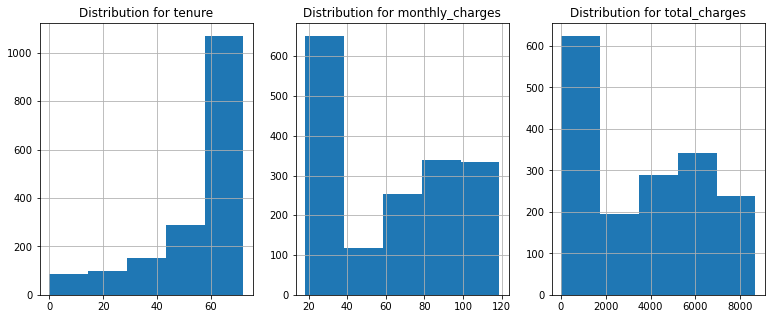

In [20]:
plt.figure(figsize=(13, 5))
for i, col in enumerate(list(df.drop(columns='customer_id').columns)):
    plotnum = i + 1
    plt.subplot(1,3,plotnum)
    plt.title(f'Distribution for {col}')
    df[col].hist(bins = 5)

<AxesSubplot:>

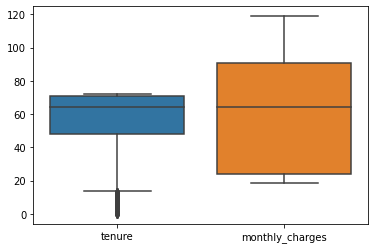

In [21]:
sns.boxplot(data=df.drop(columns=['customer_id', 'total_charges']))

<AxesSubplot:>

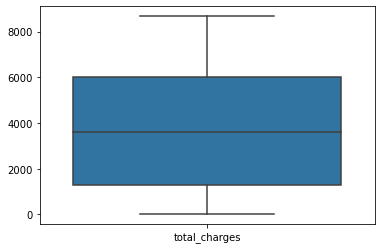

In [22]:
sns.boxplot(data=df[['total_charges']])

In [23]:
wrangle.train_validate_test_split(df)

(     customer_id  tenure  monthly_charges  total_charges
 1256  7501-IWUNG      61            73.80        4616.05
 225   1303-SRDOK      55            69.05        3842.60
 662   3967-VQOGC      67            24.90        1680.25
 628   3777-XROBG      58            19.55        1079.65
 824   5075-JSDKI      59            24.45        1493.10
 ...          ...     ...              ...            ...
 441   2664-XJZNO      72           104.90        7559.55
 98    0567-XRHCU      69            43.95        2960.10
 886   5334-AFQJB      72            25.10        1789.90
 322   2001-MCUUW      46           108.65        4903.20
 1593  9418-RUKPH      38            19.95         756.40
 
 [949 rows x 4 columns],
      customer_id  tenure  monthly_charges  total_charges
 132   0780-XNZFN      57            20.65        1125.60
 1616  9548-LIGTA      61            81.05        4747.65
 1203  7139-JZFVG      60            60.50        3694.45
 367   2229-DPMBI       8            19.50   

3. End with a python file wrangle.py that contains the function, ```wrangle_telco()```, that will acquire the data and return a dataframe cleaned with no missing values.

In [6]:
wrangle_telco()

